In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os

In [24]:
# Установка библиотек
!pip install pandas numpy matplotlib seaborn

In [46]:
# 1. Загрузка мутационных и клинических данных
# Скачивание файлов по URL
gene_url = 'https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__WUSM__Mutation__GAIIx__01_28_2016__BI__Gene__Firehose_MutSig2CV.cbt'
site_url = 'https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__WUSM__Mutation__GAIIx__01_28_2016__BI__Site__Firehose_MutSig2CV.cbt'
gene_file = 'gene_mutations.cbt'
site_file = 'site_mutations.cbt'

print("\nСкачивание файла мутаций генов...")
!wget -O {gene_file} {gene_url}
if not os.path.exists(gene_file):
    print(f"Ошибка: Не удалось скачать {gene_file}.")
    exit()

print("\nСкачивание файла мутаций сайтов...")
!wget -O {site_file} {site_url}
if not os.path.exists(site_file):
    print(f"Ошибка: Не удалось скачать {site_file}.")
    exit()


Скачивание файла мутаций генов...
--2025-05-25 16:51:56--  https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__WUSM__Mutation__GAIIx__01_28_2016__BI__Gene__Firehose_MutSig2CV.cbt
Resolving linkedomics.org (linkedomics.org)... 52.37.41.236
Connecting to linkedomics.org (linkedomics.org)|52.37.41.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2687835 (2.6M)
Saving to: ‘gene_mutations.cbt’

gene_mutations.cbt  100%[===================>]   2.56M  2.40MB/s    in 1.1s    

2025-05-25 16:51:57 (2.40 MB/s) - ‘gene_mutations.cbt’ saved [2687835/2687835]


Скачивание файла мутаций сайтов...
--2025-05-25 16:51:57--  https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__WUSM__Mutation__GAIIx__01_28_2016__BI__Site__Firehose_MutSig2CV.cbt
Resolving linkedomics.org (linkedomics.org)... 52.37.41.236
Connecting to linkedomics.org (linkedomics.org)|52.37.41.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34791 (34K)


In [49]:
# Загрузка клинических данных
clinical_file = 'processed_clinical.csv'
if not os.path.exists(clinical_file):
    print("\nФайл с клиническими данными не найден.")
    uploaded = files.upload()
    if not uploaded:
        print("Ошибка")
        exit()
    clinical_file = list(uploaded.keys())[0]
    print(f"Загружен файл: {clinical_file}")

In [50]:
# Чтение данных
try:
    gene_mutations = pd.read_csv(gene_file, sep='\t')
    gene_mutations = gene_mutations.rename(columns={'attrib_name': 'Gene'}).set_index('Gene')
except Exception as e:
    print(f"Ошибка при чтении файла мутаций генов: {e}")
    exit()

try:
    site_mutations = pd.read_csv(site_file, sep='\t')
    site_mutations = site_mutations.rename(columns={'attrib_name': 'Mutation'})
except Exception as e:
    print(f"Ошибка при чтении файла мутаций сайтов: {e}")
    exit()

try:
    clinical_data = pd.read_csv(clinical_file)
except Exception as e:
    print(f"Ошибка при чтении клинических данных: {e}")
    exit()

In [51]:
# 2. Первичный анализ
# Гены
print("\nМутации генов (первые 5 строк):")
print(gene_mutations.head())
print(f"Размер: {gene_mutations.shape[0]} генов, {gene_mutations.shape[1]} образцов")
mutation_freq = gene_mutations.sum(axis=1) / gene_mutations.shape[1] * 100
print("\nТоп-5 генов по частоте мутаций (% образцов):")
print(mutation_freq.sort_values(ascending=False).head())


Мутации генов (первые 5 строк):
         TCGA.EJ.5499  TCGA.HC.7210  TCGA.HI.7171  TCGA.KK.A6E1  TCGA.QU.A6IM  \
Gene                                                                            
A1CF                0             1             1             1             1   
A2BP1               0             0             0             0             0   
A4GALT              0             0             0             0             0   
AADACL4             0             0             0             0             0   
AASS                0             0             0             0             0   

         TCGA.XK.AAIW  TCGA.YL.A8SH  TCGA.CH.5750  TCGA.EJ.5530  TCGA.HC.7736  \
Gene                                                                            
A1CF                1             1             0             0             0   
A2BP1               1             0             1             1             1   
A4GALT              1             0             0             0            

In [52]:
# Сайты
print("\nМутации сайтов (первые 5 строк):")
print(site_mutations.head())
print(f"Всего SNV: {site_mutations.shape[0]}")
# Извлечение гена из Mutation
site_mutations['Gene'] = site_mutations['Mutation'].str.split('_', expand=True)[0]
site_gene_freq = site_mutations.groupby('Gene').sum().iloc[:, 1:-1].sum(axis=1) / gene_mutations.shape[1] * 100
print("\nТоп-5 генов по SNV (% образцов):")
print(site_gene_freq.sort_values(ascending=False).head())


Мутации сайтов (первые 5 строк):
           Mutation  TCGA.EJ.5499  TCGA.HC.7210  TCGA.KK.A6E1  TCGA.QU.A6IM  \
0     AGAP6_p.S104I             0             0             0             0   
1     CANT1_p.K131R             0             0             0             0   
2  CNTNAP1_p.S1029I             0             0             0             0   
3   DPY19L2_p.M210V             0             0             0             0   
4      EMG1_p.F42fs             0             0             0             0   

   TCGA.XK.AAIW  TCGA.YL.A8SH  TCGA.EJ.5530  TCGA.HC.7736  TCGA.KK.A6E6  ...  \
0             0             0             0             0             0  ...   
1             0             0             0             0             0  ...   
2             0             0             0             0             0  ...   
3             0             0             0             0             0  ...   
4             0             0             0             0             0  ...   

   TCGA.ZG

In [53]:
# Клинические данные
print("\nКлинические данные (первые 5 строк):")
print(clinical_data[['patient_id', 'status', 'residual_tumor']].head())
print("\nРаспределение residual_tumor:")
print(clinical_data['residual_tumor'].value_counts(dropna=False).to_dict())


Клинические данные (первые 5 строк):
     patient_id  status residual_tumor
0  TCGA.CH.5753     0.0             r0
1  TCGA.CH.5763     0.0             r0
2  TCGA.CH.5764     0.0             r0
3  TCGA.CH.5772     0.0             r1
4  TCGA.CH.5790     0.0             r0

Распределение residual_tumor:
{'r0': 317, 'r1': 147, nan: 30, 'r2': 5}


In [54]:
# 3. Объединение данных
# Очистка patient_id
clinical_data['patient_id_clean'] = clinical_data['patient_id'].str.replace('TCGA.', '', regex=False)
gene_mutations.columns = gene_mutations.columns.str.replace('TCGA.', '', regex=False)
site_mutations.columns = [col.replace('TCGA.', '') if col != 'Mutation' else col for col in site_mutations.columns]

In [55]:
# Проверка общих образцов
common_samples = list(set(gene_mutations.columns).intersection(set(clinical_data['patient_id_clean'])))
if not common_samples:
    print("Ошибка: Нет общих образцов.")
    print("Гены (первые 5):", gene_mutations.columns.tolist()[:5])
    print("Клинические (первые 5):", clinical_data['patient_id_clean'].tolist()[:5])
    exit()
print(f"\nОбщие образцы: {len(common_samples)}")


Общие образцы: 498


In [56]:
# Фильтрация
gene_mutations = gene_mutations[common_samples]
site_mutations = site_mutations[['Mutation', 'Gene'] + common_samples]
clinical_data = clinical_data[clinical_data['patient_id_clean'].isin(common_samples)]

In [57]:
# Маппинг рецидива
recurrence_col = 'residual_tumor'
recurrence_values = {'r0': 'No', 'r1': 'Yes', 'r2': 'Yes', np.nan: 'No'}
clinical_data['recurrence_mapped'] = clinical_data[recurrence_col].map(recurrence_values)
print("\nРаспределение рецидива (mapped):")
print(clinical_data['recurrence_mapped'].value_counts(dropna=False).to_dict())


Распределение рецидива (mapped):
{'No': 346, 'Yes': 152}


In [58]:
# 4. Часто мутирующие гены
# Частота мутаций (из gene_mutations)
mutation_freq = gene_mutations.sum(axis=1) / gene_mutations.shape[1] * 100
freq_df = pd.DataFrame({'Gene': mutation_freq.index, 'Mutation_Frequency (%)': mutation_freq.values})
freq_df = freq_df.sort_values('Mutation_Frequency (%)', ascending=False)
freq_df = freq_df[freq_df['Mutation_Frequency (%)'] > 5]  # Фильтр >5%
print("\nЧасто мутирующие гены (>5%):")
print(freq_df.head(10))



Часто мутирующие гены (>5%):
       Gene  Mutation_Frequency (%)
2451    TTN               12.650602
2391   TP53               11.445783
2233   SPOP               11.445783
1458  MUC16                7.429719
1459  MUC17                6.224900
1419   MLL2                5.823293
1420   MLL3                5.823293
881   FOXA1                5.622490
2235  SPTA1                5.220884
2271  SYNE1                5.220884


In [59]:
# Частота мутаций (из site_mutations)
site_mutation_freq = site_mutations[common_samples].sum(axis=1)
site_freq_df = pd.DataFrame({
    'Mutation': site_mutations['Mutation'],
    'Gene': site_mutations['Gene'],
    'Mutation_Frequency (%)': site_mutation_freq / len(common_samples) * 100
})
site_freq_df = site_freq_df.sort_values('Mutation_Frequency (%)', ascending=False)
print("\nТоп-5 мутаций по SNV (% образцов):")
print(site_freq_df.head())


Топ-5 мутаций по SNV (% образцов):
          Mutation    Gene  Mutation_Frequency (%)
16    SPOP_p.W131G    SPOP                1.606426
18    SPOP_p.F133L    SPOP                1.405622
5   FAM47C_p.N648D  FAM47C                1.204819
19    SPOP_p.F133V    SPOP                1.204819
20    SPOP_p.F102V    SPOP                0.803213


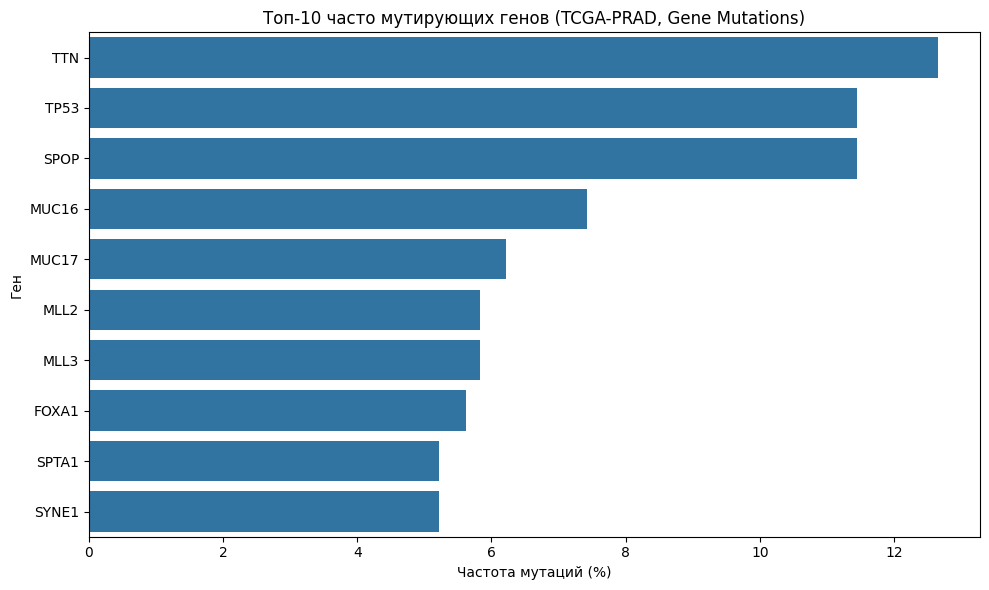

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
# 5. Визуализация
# Bar plot: топ-10 генов (gene_mutations)
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutation_Frequency (%)', y='Gene', data=freq_df.head(10))
plt.title('Топ-10 часто мутирующих генов (TCGA-PRAD, Gene Mutations)')
plt.xlabel('Частота мутаций (%)')
plt.ylabel('Ген')
plt.tight_layout()
plt.savefig('top10_mutated_genes.png')
plt.show()
plt.close()
files.download('top10_mutated_genes.png')

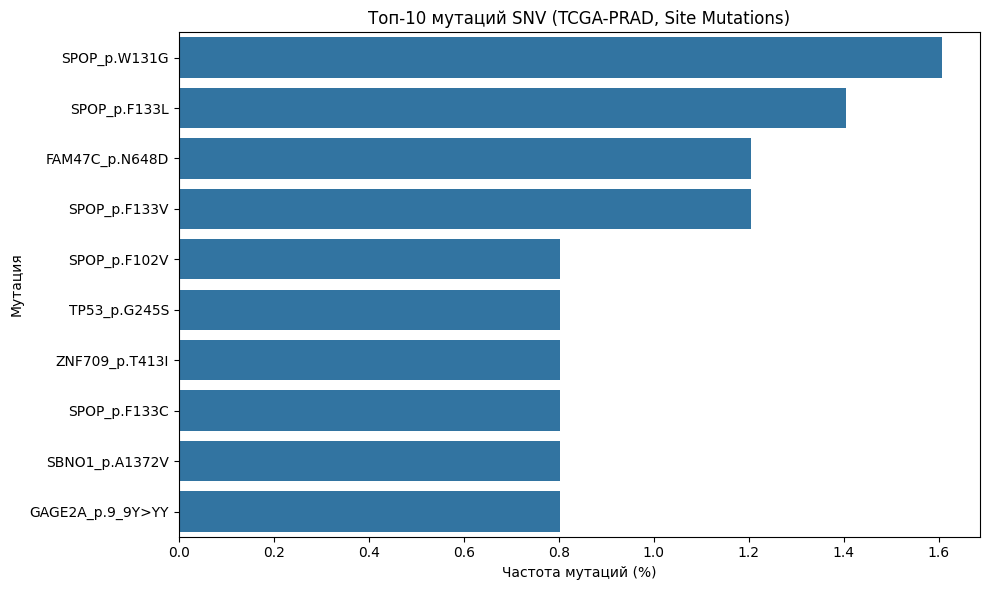

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
# Bar plot: топ-10 мутаций (site_mutations)
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutation_Frequency (%)', y='Mutation', data=site_freq_df.head(10))
plt.title('Топ-10 мутаций SNV (TCGA-PRAD, Site Mutations)')
plt.xlabel('Частота мутаций (%)')
plt.ylabel('Мутация')
plt.tight_layout()
plt.savefig('top10_snv_mutations.png')
plt.show()
plt.close()
files.download('top10_snv_mutations.png')

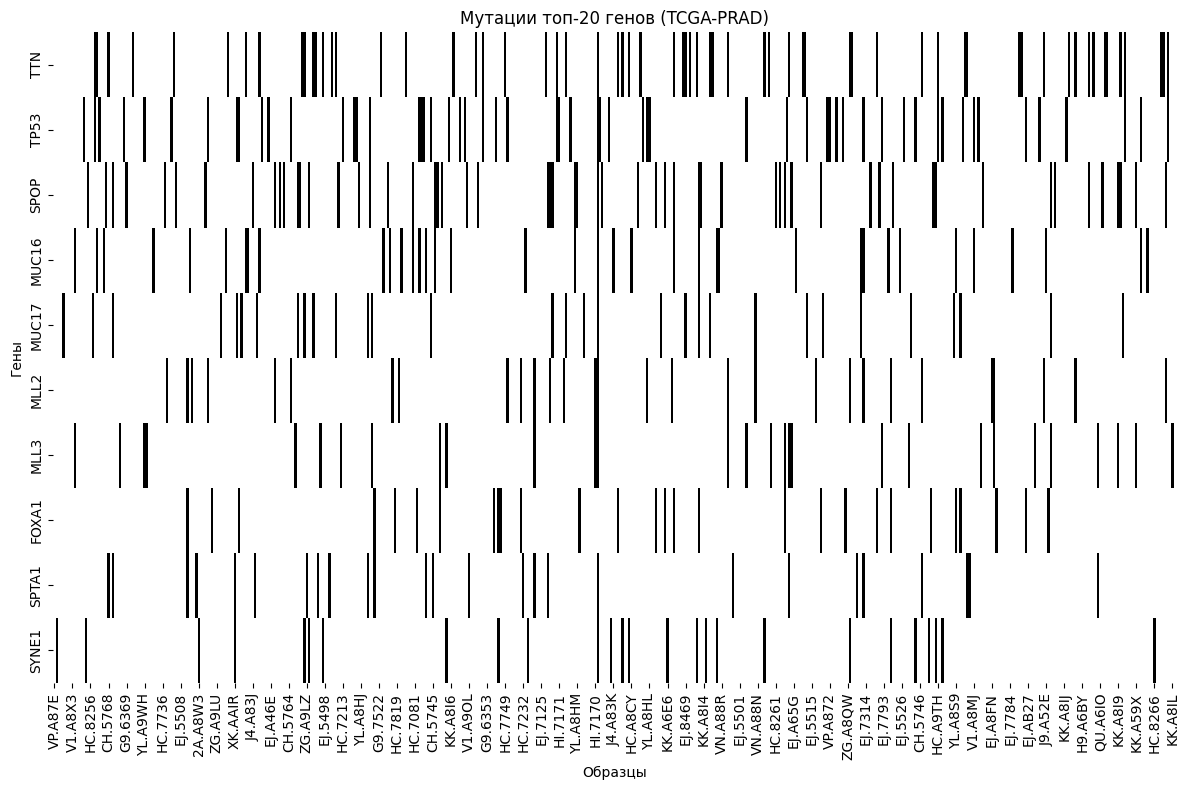

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
# Heatmap: топ-20 генов (gene_mutations)
top_genes = freq_df['Gene'].head(20)
if len(top_genes) > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(gene_mutations.loc[top_genes], cmap='binary', cbar=False)
    plt.title('Мутации топ-20 генов (TCGA-PRAD)')
    plt.xlabel('Образцы')
    plt.ylabel('Гены')
    plt.tight_layout()
    plt.savefig('mutation_heatmap.png')
    plt.show()
    plt.close()
    files.download('mutation_heatmap.png')

In [64]:
# 6. Сохранение результатов
freq_df.to_csv('frequent_mutations.csv', index=False)
print("\nТаблица часто мутирующих генов сохранена в 'frequent_mutations.csv'")
files.download('frequent_mutations.csv')

site_freq_df.to_csv('frequent_snv_mutations.csv', index=False)
print("Таблица часто мутирующих SNV сохранена в 'frequent_snv_mutations.csv'")
files.download('frequent_snv_mutations.csv')


Таблица часто мутирующих генов сохранена в 'frequent_mutations.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Таблица часто мутирующих SNV сохранена в 'frequent_snv_mutations.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# Сохранение объединённых данных
merged_data = gene_mutations.T.reset_index().rename(columns={'index': 'patient_id_clean'})
merged_data = merged_data.merge(clinical_data, on='patient_id_clean', how='left')
merged_data.to_csv('merged_mutation_clinical.csv', index=False)
print("Объединённые данные сохранены в 'merged_mutation_clinical.csv'")
files.download('merged_mutation_clinical.csv')

print("\nАнализ завершён!")

Объединённые данные сохранены в 'merged_mutation_clinical.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Анализ завершён!
